In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
import sys
sys.path.insert(0, r'C:/Users/Angie Michaiel/Documents/GitHub/FreelyMovingEphys')
from util.paths import find
from project_analysis.ephys.ephys_utils import load_ephys
from project_analysis.doi.doi_utils import doi_saline_label
from project_analysis.doi.doi_utils import pre_post_label
from project_analysis.doi.doi_utils import label_doi_conditions

In [3]:
# load data from days of recordings 
data_path = r'\\kraken\Z\freely_moving_ephys'
dates = ['021621','021721']
data = load_ephys(data_path,dates)


In [4]:
#Dictonary of conditions
conditions = {}
conditions['doi_saline'] = {'doi_dates':['021621'],'saline_dates':['021721']}
conditions['pre_post'] = {'pre_dates':[],'post_dates':['021721']}
print(conditions)



{'doi_saline': {'doi_dates': ['021621'], 'saline_dates': ['021721']}, 'pre_post': {'pre_dates': [], 'post_dates': ['021721']}}


In [5]:
# Add conditions to data_dataframe 
pd.set_option('display.max_rows', None)
conditions_df = label_doi_conditions(data,conditions)


In [6]:
goodcells_df = conditions_df.loc[conditions_df['KSLabel']=='good']
goodcells_df= goodcells_df[:-1]
goodcells_df.dtypes
#conditions_df['hf1_wn_n_spikes']

Amplitude                                                 float64
ContamPct                                                 float64
KSLabel                                                    object
amp                                                       float64
ch                                                          int64
depth                                                       int64
fr                                                        float64
group                                                      object
fm1_n_spikes                                                int64
sh                                                          int64
waveform                                                   object
fm1_spikeT                                                 object
t0                                                        float64
fm1_spikeTraw                                              object
fm1_rate                                                   object
fm1_c_rang

In [7]:
#Add column of Total time of recordings as total seconds
goodcells_df['Tsec_fm1'] = goodcells_df['fm1_spikeTraw'].str[-1]
goodcells_df['Tsec_fm2'] = goodcells_df['fm2_spikeTraw'].str[-1]
goodcells_df['Tsec_hf1'] = goodcells_df['hf1_wn_spikeTraw'].str[-1]
goodcells_df['Tsec_hf8'] = goodcells_df['hf8_wn_spikeTraw'].str[-1]
goodcells_df['Tsec_hf2'] = goodcells_df['hf2_sprasenoiseflash_spikeTraw'].str[-1]
goodcells_df['Tsec_hf7'] = goodcells_df['hf7_sprasenoiseflash_spikeTraw'].str[-1]
goodcells_df['Tsec_hf3'] = goodcells_df['hf3_gratings_spikeTraw'].str[-1]
goodcells_df['Tsec_hf6'] = goodcells_df['hf6_gratings_spikeTraw'].str[-1]



In [8]:
goodcells_df['Tsec_hf1']

5      635.844100
8      635.953867
17     635.942333
21     635.963367
49     620.117733
56     635.951133
57     635.367700
59     635.945833
61     631.968467
67     635.626133
76     633.308800
77     627.911333
81     609.738400
55     699.972867
56     700.115267
107    698.395367
Name: Tsec_hf1, dtype: float64

In [9]:
# Make colums for nspikes per recording
goodcells_df['Tspikes_fm1']=goodcells_df['fm1_spikeT'].apply(len)
goodcells_df['Tspikes_fm2']=goodcells_df['fm2_spikeT'].apply(len)
goodcells_df['Tspikes_hf1']=goodcells_df['hf1_wn_spikeT'].apply(len)
goodcells_df['Tspikes_hf8']=goodcells_df['hf8_wn_spikeT'].apply(len)
goodcells_df['Tspikes_hf2']=goodcells_df['hf2_sprasenoiseflash_spikeT'].apply(len)
goodcells_df['Tspikes_hf7']=goodcells_df['hf7_sprasenoiseflash_spikeT'].apply(len)
goodcells_df['Tspikes_hf3']=goodcells_df['hf3_gratings_spikeT'].apply(len)
goodcells_df['Tspikes_hf6']=goodcells_df['hf6_gratings_spikeT'].apply(len)


In [10]:
#Calculate mean firing rate
goodcells_df['meanfr_fm1'] = goodcells_df['Tspikes_fm1']/goodcells_df['Tsec_fm1']
goodcells_df['meanfr_fm2'] = goodcells_df['Tspikes_fm2']/goodcells_df['Tsec_fm2']
goodcells_df['meanfr_hf1'] = goodcells_df['Tspikes_hf1']/goodcells_df['Tsec_hf1']
goodcells_df['meanfr_hf8'] = goodcells_df['Tspikes_hf8']/goodcells_df['Tsec_hf8']
goodcells_df['meanfr_hf2'] = goodcells_df['Tspikes_hf2']/goodcells_df['Tsec_hf2']
goodcells_df['meanfr_hf7'] = goodcells_df['Tspikes_hf7']/goodcells_df['Tsec_hf7']
goodcells_df['meanfr_hf3'] = goodcells_df['Tspikes_hf3']/goodcells_df['Tsec_hf3']
goodcells_df['meanfr_hf6'] = goodcells_df['Tspikes_hf6']/goodcells_df['Tsec_hf6']


In [11]:
#goodcells_df.dtypes

Amplitude                                                 float64
ContamPct                                                 float64
KSLabel                                                    object
amp                                                       float64
ch                                                          int64
depth                                                       int64
fr                                                        float64
group                                                      object
fm1_n_spikes                                                int64
sh                                                          int64
waveform                                                   object
fm1_spikeT                                                 object
t0                                                        float64
fm1_spikeTraw                                              object
fm1_rate                                                   object
fm1_c_rang

In [12]:
#Dataframes of DOI and saline groups
doi_df = goodcells_df.loc[goodcells_df['hf7_sprasenoiseflashdoi/saline']=='doi']
#print(doi_df)
saline_df = goodcells_df.loc[goodcells_df['hf7_sprasenoiseflashdoi/saline']=='saline']
#print(saline_df)

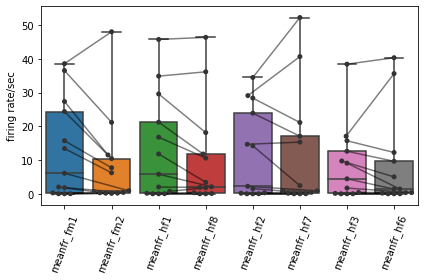

In [13]:
#plot doi fr  
fig, ax = plt.subplots()
frdoi = sns.swarmplot(data=doi_df[doi_df.columns[-8:]],ax=ax,color=".2") 
frdoi = sns.boxplot(data=doi_df[doi_df.columns[-8:]], whis=np.inf)
plt.xticks(rotation=70)
plt.ylabel('firing rate/sec')
plt.tight_layout()
#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5
idx6 = 6
idx7 = 7

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
locs7 = ax.get_children()[idx6].get_offsets()
locs8 = ax.get_children()[idx7].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs7.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs4.shape[0]):
    x = [locs7[i, 0], locs8[i, 0]]
    y = [locs7[i, 1], locs8[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

plt.savefig('doi_avgfr.png')
    

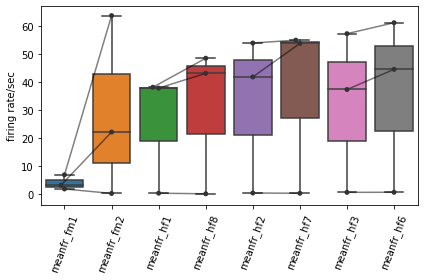

In [14]:
#plot saline 
fig, ax = plt.subplots()
frsaline = sns.swarmplot( data=saline_df[doi_df.columns[-8:]],color='.2') 
frsaline = sns.boxplot(data=saline_df[doi_df.columns[-8:]], whis=np.inf) 
plt.xticks(rotation=70)
plt.ylabel('firing rate/sec')
plt.tight_layout()

#Connecting individuals

#indx of each collunm 
idx0 = 0
idx1 = 1
idx2 = 2
idx3 = 3
idx4 = 4
idx5 = 5
idx6 = 6
idx7 = 7


#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()
locs3 = ax.get_children()[idx2].get_offsets()
locs4 = ax.get_children()[idx3].get_offsets()
locs5 = ax.get_children()[idx4].get_offsets()
locs6 = ax.get_children()[idx5].get_offsets()
locs7 = ax.get_children()[idx6].get_offsets()
locs8 = ax.get_children()[idx7].get_offsets()
for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs3.shape[0]):
    x = [locs3[i, 0], locs4[i, 0]]
    y = [locs3[i, 1], locs4[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs7.shape[0]):
    x = [locs5[i, 0], locs6[i, 0]]
    y = [locs5[i, 1], locs6[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
for i in range(locs4.shape[0]):
    x = [locs7[i, 0], locs8[i, 0]]
    y = [locs7[i, 1], locs8[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)

    
plt.savefig('saline_avgfr.png')



In [24]:
#grating psth analysis doi 
# Create psth_df for doi  
doi_df['maxpsth_hf3']=doi_df['hf3_gratings_grating_psth'].apply(max)
doi_df['maxpsth_hf6']=doi_df['hf6_gratings_grating_psth'].apply(max)
doi_df['maxpsth']=doi_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthdoi_df=doi_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]

#Calculate normalized psth
psthdoi_df['normalizedpsth_pre']=psthdoi_df['hf3_gratings_grating_psth']/psthdoi_df['maxpsth']
psthdoi_df['normalizedpsth_post']=psthdoi_df['hf6_gratings_grating_psth']/psthdoi_df['maxpsth']

#Calculate meanpsth
psthdoi_df['meanpsth_pre']=psthdoi_df['normalizedpsth_pre'].apply(np.mean)
psthdoi_df['meanpsth_post']=psthdoi_df['normalizedpsth_post'].apply(np.mean)

#print(psthdoi_df)


C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

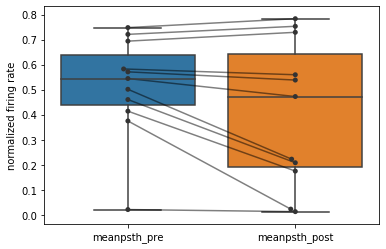

In [46]:
#plot doi PSTH 
fig, ax = plt.subplots()
psthdoi = sns.swarmplot(data=psthdoi_df[psthdoi_df.columns[-2:]],ax=ax,color=".2") 
psthdoi = sns.boxplot(data=psthdoi_df[psthdoi_df.columns[-2:]], whis=np.inf)
plt.ylabel('normalized firing rate')

#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
plt.savefig('psth_doi.png')


In [43]:
#grating psth analysis saline 
# Create psth_df for saline  
saline_df['maxpsth_hf3']=saline_df['hf3_gratings_grating_psth'].apply(max)
saline_df['maxpsth_hf6']=saline_df['hf6_gratings_grating_psth'].apply(max)
saline_df['maxpsth']=saline_df[['maxpsth_hf3','maxpsth_hf6']].max(axis=1)
psthsaline_df=saline_df[['hf3_gratings_grating_psth','hf6_gratings_grating_psth','maxpsth']]


#Calculate normalized psth
psthsaline_df['normalizedpsth_pre']=psthsaline_df['hf3_gratings_grating_psth']/psthsaline_df['maxpsth']
psthsaline_df['normalizedpsth_post']=psthsaline_df['hf6_gratings_grating_psth']/psthsaline_df['maxpsth']

#Calculate meanpsth
psthsaline_df['meanpsth_pre']=psthsaline_df['normalizedpsth_pre'].apply(np.mean)
psthsaline_df['meanpsth_post']=psthsaline_df['normalizedpsth_post'].apply(np.mean)





C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Angie Michaiel\anaconda3\envs\DLC-CPU\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

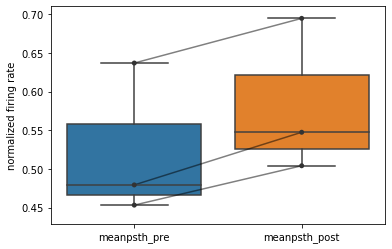

In [47]:
#plot doi PSTH 
fig, ax = plt.subplots()
psthsaline = sns.swarmplot(data=psthsaline_df[psthsaline_df.columns[-2:]],ax=ax,color=".2") 
psthsaline = sns.boxplot(data=psthsaline_df[psthsaline_df.columns[-2:]], whis=np.inf)
plt.ylabel('normalized firing rate')


#Connect cells
#indx of each collunm 
idx0 = 0
idx1 = 1

#find paried points
locs1 = ax.get_children()[idx0].get_offsets()
locs2 = ax.get_children()[idx1].get_offsets()

for i in range(locs1.shape[0]):
    x = [locs1[i, 0], locs2[i, 0]]
    y = [locs1[i, 1], locs2[i, 1]]
    ax.plot(x, y, color='black', alpha=0.5)
plt.savefig('psth_saline.png')